In [26]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import sys
import os
sys.path.insert(0, '..')
from spectral_denoising.spectral_operations import *
from spectral_denoising.spectra_plotter import *
from spectral_denoising.spectral_denoising import *
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/fig1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Alkaloids_lib/QTTOF_pos.csv')

In [4]:
specs = []
for index, row in data.iterrows():
    specs.append(str_to_arr(row['msms']))
data['msms']=specs

In [16]:
row = data.iloc[4]

In [37]:
row

precursor_mz                                                159.026448
CAS                                                            68-94-0
reference_adduct                                               [M+Na]+
reference_mz                                                159.027731
comment                                                          Major
reference_smiles                                 O=c1nc[nH]c2nc[nH]c12
reference_formula                                              C5H4N4O
reference_mix                                       Alkaloids-pos-mix1
reference_rt                                      [0.36, 0.549, 0.454]
reference_name                                            Hypoxanthine
rt_apex                                                       0.360643
rt_start                                                      0.335217
rt_end                                                        0.417717
ms1_intensity                                                  22945.0
n_scna

In [38]:
mass, intensity = break_spectrum(row['msms'])
mass = np.append(mass, row['precursor_mz']-20.12)
intensity = np.append(intensity, 321)
spec = pack_spectrum(mass, intensity)
spec_e_cleaned = electronic_denoising(spec)
spec_e_c_cleaned = spectral_denoising(spec, row['reference_smiles'], row['reference_adduct'])

In [42]:
spec

array([[ 41.03965759,  31.        ],
       [ 43.01823425,  31.        ],
       [ 44.01521301,  31.        ],
       [ 44.98125076,  62.        ],
       [ 45.98822403, 123.        ],
       [ 46.86693954,  26.        ],
       [ 46.99576187, 242.        ],
       [ 47.33885956,  26.        ],
       [ 47.98018646,  62.        ],
       [ 48.99249649, 154.        ],
       [ 50.97064209,  31.        ],
       [ 51.94101715,  26.        ],
       [ 55.02980804,  26.        ],
       [ 55.9381485 ,  62.        ],
       [ 56.96720123,  26.        ],
       [ 57.93191147,  26.        ],
       [ 59.9323349 ,  26.        ],
       [ 60.48329926,  26.        ],
       [ 61.01267242, 198.        ],
       [ 62.01753616,  62.        ],
       [ 63.0060997 , 265.        ],
       [ 63.80952835,  26.        ],
       [ 63.99686813, 663.        ],
       [ 64.33860016,  26.        ],
       [ 64.49740601,  26.        ],
       [ 64.99762726,  31.        ],
       [ 65.56567383,  26.        ],
 

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

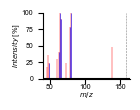

In [70]:
from spectral_denoising.spectra_plotter import *
ms2_overlay(
    # msms_1= spec,
            msms_2 = spec_e_cleaned, msms_3 = spec_e_c_cleaned,pmz = row['precursor_mz'],
                    savepath= os.path.join(fig_dir, 'fig1_with_chemical_noise.eps')
                    )

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

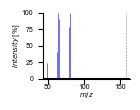

In [71]:
ms2_overlay(
    # msms_1= spec,
            # msms_2 = spec_e_cleaned, 
            msms_3 = spec_e_c_cleaned,pmz = row['precursor_mz'],
                    savepath= os.path.join(fig_dir, 'clean.eps')
                    )